# Python and finances

On this notebook, I will apply what I learn regarding finances to real life and updated examples of stock markets. Its purpose can be divided into two parts.  First, to serve both as a portfolio. Second, to provide me with a place to accumulate what I learn, as well as review it whenever necessary.

# Part 1: Reading prices from the web

The first part of this notebook will make use of <a href="https://pandas-datareader.readthedocs.io/en/latest/">pandas_datareader</a> library to download and visualize stock market data from the internet.

In [2]:
#Libraries
import numpy as np
import pandas as pd
from pandas_datareader import data as pddr
import matplotlib.pyplot as plt
import seaborn as sns

To download data from the internet using pandas datareader we need to provide three arguments to the built-in **pandas_datareader.DataReader()**:
1) The company tag of interest such as, for example, Proctor and Gamble is 'PG'
2) The provider of this data. For example, 'yahoo'
3) The starting datetime point from which we want to load the data, such as '1995-1-1'.
Let's practice by using that information and visualizing it in a plot.

In [3]:
PG = pddr.DataReader('PG',data_source='yahoo',start='1995-1-1').reset_index()
PG.head()

Date      High       Low      Open     Close     Volume  Adj Close
0 1995-01-03  15.62500  15.43750  15.46875  15.59375  3318400.0   8.215732
1 1995-01-04  15.65625  15.31250  15.53125  15.46875  2218800.0   8.149876
2 1995-01-05  15.43750  15.21875  15.37500  15.25000  2319600.0   8.034625
3 1995-01-06  15.40625  15.15625  15.15625  15.28125  3438000.0   8.051086
4 1995-01-09  15.40625  15.18750  15.34375  15.21875  1795200.0   8.018162

(Text(0.5, 1.0, 'Proctor and Gamble Adj Close over time'),
 Text(0.5, 0, 'Time (non-formatted)'),
 Text(0, 0.5, 'Adj Close'))

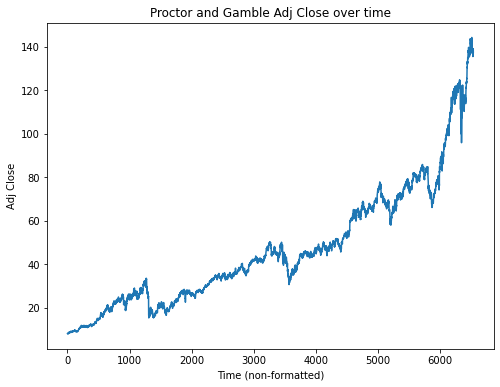

In [4]:
plt.figure()
PG['Adj Close'].plot(figsize=(8,6))
plt.title("Proctor and Gamble Adj Close over time"), plt.xlabel("Time (non-formatted)"), plt.ylabel("Adj Close")

# Part 2: Rates of return

A rate of return (RoR) is the net gain or loss of an investment over a specified period of time, expressed as a percentage of the investment’s initial cost. 

The most used formulas are the simple rate of return and the log rate of return. Simple returns and log returns are different, but in some respects interchangeable. The two types act very differently when it comes to aggregation.  Each has an advantage over the other:

1) simple returns aggregate across assets

2) log returns aggregate across time

The simple return of a portfolio is the weighted sum of the simple returns of the constituents of the portfolio. 

The log return for a time period is the sum of the log returns of partitions of the time period.  For example the log return for a year is the sum of the log returns of the days within the year.

### Simple rate of return

The simple rate of return is defined by the equation

<center>
    Simple RoR = $\frac{\text{Current value} - \text{Initial value}}{\text{Initial value}}.$
</center>

We can express this referring to the adjusted closing price $P$ as
<center>
Simple RoR= $\frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1.$
</center>    

The initial value could be the previous day (daily rate of return), month (monthly rate of return) or years (yearly rate of return).
Let's start by calculating the daily simple RoR of the data we read in the previous cell.

In [5]:
PG['Simple_RoR'] = (PG['Adj Close'] / PG['Adj Close'].shift(1)) - 1
PG.head()

Date      High       Low      Open     Close     Volume  Adj Close  \
0 1995-01-03  15.62500  15.43750  15.46875  15.59375  3318400.0   8.215732   
1 1995-01-04  15.65625  15.31250  15.53125  15.46875  2218800.0   8.149876   
2 1995-01-05  15.43750  15.21875  15.37500  15.25000  2319600.0   8.034625   
3 1995-01-06  15.40625  15.15625  15.15625  15.28125  3438000.0   8.051086   
4 1995-01-09  15.40625  15.18750  15.34375  15.21875  1795200.0   8.018162   

   Simple_RoR  
0         NaN  
1   -0.008016  
2   -0.014141  
3    0.002049  
4   -0.004089

As we can see, the rate of return is usually a small number. This is reasonable because significant movements of a company's stock price are not an everyday occurrence. This is easily visualized by a plot over time.

(Text(0.5, 1.0, 'Proctor and Gamble simple rate of return over time'),
 Text(0.5, 0, 'Time (non-formatted)'),
 Text(0, 0.5, 'Simple RoR'))

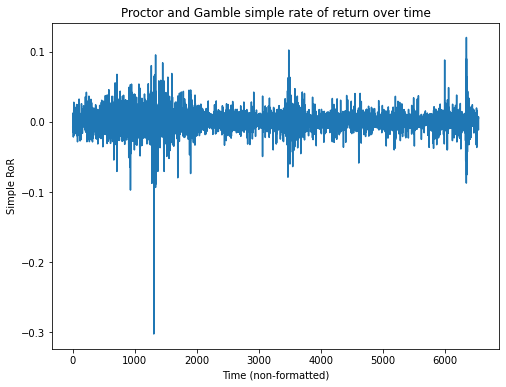

In [6]:
plt.figure()
PG['Simple_RoR'].plot(figsize=(8,6))
plt.title("Proctor and Gamble simple rate of return over time"), plt.xlabel("Time (non-formatted)"), plt.ylabel("Simple RoR")

Usually, positive returns stack up in the stock prices, but significant negative events drop them quickly.

As an investor interested in the long term dynamics, we are mostly interested in the mean value of the rate of return under analysis.

*Remark*: Removing weekends, the trading year is defined by around 250/251 days, which is the data we have downloaded. If we calculate the daily mean value rate of return, the data might be hard to understand (not really). So it is better to analyze the rate of return for the trading year.

In [7]:
avg_simple_ROR = PG['Simple_RoR'].mean()
avg_simple_ROR
print(str(round(avg_simple_ROR,5)*100)+' %')

avg_simple_ROR = PG['Simple_RoR'].mean()*250
avg_simple_ROR
print(str(round(avg_simple_ROR,5)*100)+' %')

0.053 %
13.338 %


### Logarithmic rate of return

The logarithmic rate of return is defined by the equation

<center>
    Log RoR = $\text{log}\left(\frac{\text{Current value}}{\text{Initial value}}\right),$
</center>

or in our terms 
<center>
    Log RoR = $\text{log}\frac{P_1}{P_0}.$
<center>
    
Let us now calculate the logarithmic rate of return and compare it with the simple rate of return.

0.043 %
10.774000000000001 %


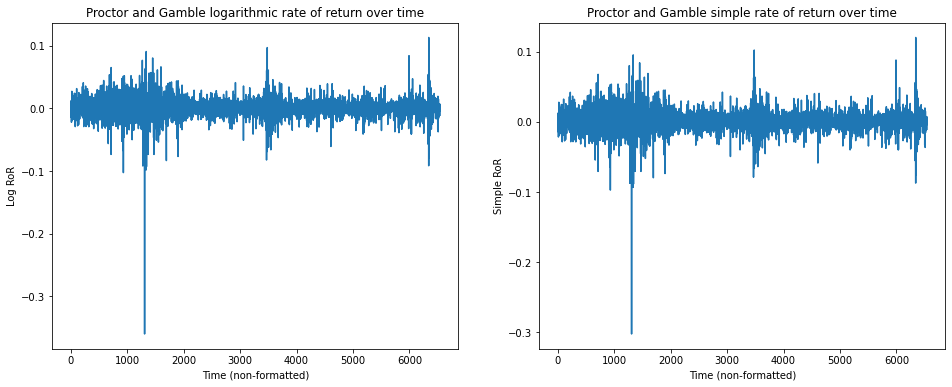

In [8]:
PG['Log_RoR'] = np.log((PG['Adj Close'] / PG['Adj Close'].shift(1)))

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
PG['Log_RoR'].plot()
plt.title("Proctor and Gamble logarithmic rate of return over time"), plt.xlabel("Time (non-formatted)"), plt.ylabel("Log RoR")
plt.subplot(1,2,2)
PG['Simple_RoR'].plot()
plt.title("Proctor and Gamble simple rate of return over time"), plt.xlabel("Time (non-formatted)"), plt.ylabel("Simple RoR")
avg_log_ROR = PG['Log_RoR'].mean()
avg_log_ROR
print(str(round(avg_log_ROR,5)*100)+' %')

avg_log_ROR = PG['Log_RoR'].mean()*250
avg_log_ROR
print(str(round(avg_log_ROR,5)*100)+' %')

As we can see, both rate of returns measure the same with very few differences.

# Part 3: Rate of return of multiple investments

*Definition 3.1*: An <u>investment portfolio</u> is a basket of assets that can hold stocks, bonds, cash and more. Investors aim for a return by mixing these securities in a way that reflects their risk tolerance and financial goals.

*Definition 3.2*: The <u>rate of return of a portfolio</u> can be specified by a set of weights {$w_1,\dots,w_N$}, where $N$ is the number of different investments and the weights denote how much is invested into each on of them. Mathematically:

<center> Portfolio's RoR = $\sum_{i=1}^{N}\text{(RoR of the i-th security)}*\text{(i-th weight in portfolio)}$ </center>

Basically, an investor might diversify the portfolio to optimize the winning ratios and reduce risk. A simple example could be a portfolio consisting of four companies stock, such as {Proctor & Gamble, Microsoft, Ford, General Electric}

Given the historical rate of return, we want to calculate the Expected rate of our investments. Let's do this.

In [9]:
tickers = ['PG','MSFT','F','GE']
portfolio = pd.DataFrame()
for t in tickers:
    portfolio[t] = pddr.DataReader(t, data_source='yahoo', start = '1995-1-1')['Adj Close']
portfolio

PG        MSFT         F         GE
Date                                                   
1995-01-03    8.215732    2.394761  4.242091   4.058363
1995-01-04    8.149876    2.412169  4.356228   4.058363
1995-01-05    8.034625    2.372380  4.318182   4.068309
1995-01-06    8.051086    2.412169  4.318182   4.048415
1995-01-09    8.018162    2.397249  4.394274   4.008627
...                ...         ...       ...        ...
2020-12-15  136.649994  214.130005  9.150000  11.099789
2020-12-16  137.270004  219.279999  9.040000  10.919954
2020-12-17  138.250000  219.419998  9.080000  10.870000
2020-12-18  139.039993  218.589996  8.950000  10.810000
2020-12-21  137.550003  223.119995  8.930000  10.742600

[6540 rows x 4 columns]

As it can be seen on the dataframe's print, each company moves around different scales of values. We want to visualize them at the same time, thus we will normalize them all over their initial value and multiply them by 100. After that is accomplished, we will plot them all in a figure and see how they compare over time.

(Text(0, 0.5, 'Normalized Adj Close'),
 Text(0.5, 1.0, 'Normalized Adj Close for an example of an investment portfolio'))

<Figure size 432x288 with 0 Axes>

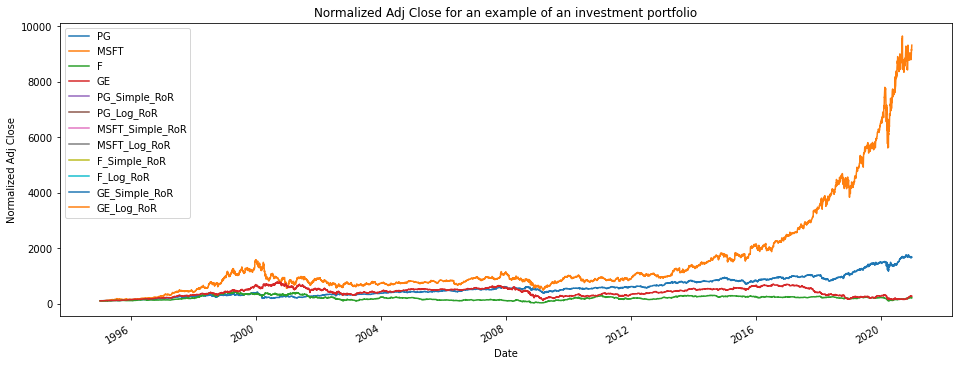

In [42]:
plt.figure()
(portfolio/portfolio.iloc[0] * 100).plot(figsize=(16,6))
plt.ylabel('Normalized Adj Close'), plt.title('Normalized Adj Close for an example of an investment portfolio')

As we can see, General Electric and Ford show a past and present indicative of a clear stuck tendency, which is not very promising to have big expectations in the future (on a statistical point of view. There might be extra information which we can acquire which might tumble this assumption down). In terms of statistics, Microsoft is the clear winner, but PG still presents a small growth promise.

In order to calculate the rate of return for this portfolio, we need to assing each one of them a different weight. We will start with an uniform weight system and compare the rate of return of the portfolio.

In [11]:
returns = (portfolio / portfolio.shift(1)) - 1
print(returns.head())

weights = np.array([.25,.25,.25,.25])

annual_returns = returns.mean() * 250
print(annual_returns)

np.dot(annual_returns, weights)
print('The resulting rate of return is:')
print(str(round(np.dot(annual_returns, weights),5)*100)+' %')

                  PG      MSFT         F        GE
Date                                              
1995-01-03       NaN       NaN       NaN       NaN
1995-01-04 -0.008016  0.007269  0.026906  0.000000
1995-01-05 -0.014141 -0.016495 -0.008734  0.002451
1995-01-06  0.002049  0.016772  0.000000 -0.004890
1995-01-09 -0.004089 -0.006185  0.017621 -0.009828
PG      0.133381
MSFT    0.223408
F       0.108063
GE      0.088497
dtype: float64
The resulting rate of return is:
13.834 %


If, on the other hand, we had chosen a different set of weights, we could improve the rate of return of the portfolio. For example:

In [12]:
weights2 = np.array([.4,.4,.1,.1])
print('Comparison of rates of return for different weights')
print(str(weights)+' yields a rate of return of '+str(round(np.dot(annual_returns, weights)*100,4))+' %')
print(str(weights2)+' yields a rate of return of '+str(round(np.dot(annual_returns, weights2)*100,4))+' %')

Comparison of rates of return for different weights
[0.25 0.25 0.25 0.25] yields a rate of return of 13.8337 %
[0.4 0.4 0.1 0.1] yields a rate of return of 16.2372 %


# Part 4: Rate of return of Market indices

A market index is a hypothetical portfolio of investment holdings that represents a segment of the financial market. The calculation of the index value comes from the prices of the underlying holdings. Some indexes have values based on market-cap weighting, revenue-weighting, float-weighting, and fundamental-weighting. Weighting is a method of adjusting the individual impact of items in an index. Investors follow different market indexes to gauge market movements.

<a href="https://www.investing.com/indices/major-indices"> List of major market indices</a>

### Global market indices

We will calculate the rate of return of some of these using the following three: S&P500 ('^GSPC'), NASDAQ ('^IXIC') and German DAX ('^GDAXI').

The first thing we will easily notice is that the values of indices are much higher with respect to the adjusting closing prices of the companies we used before. That is natural because indices are composed with a basket of mini stocks. To understand the historical values, a deep understanding of what's focused by each index and the historical real life events is required. But, overall, all indices perform very well at this point in time.

Again, we have to normalize the values with respect to their starting point to visualize them in a unique plot.

In [38]:
ind_tickers = ['^GSPC','^IXIC','^GDAXI']#,'^FTSE']

ind_data = pd.DataFrame()

for t in ind_tickers:
    ind_data[t] = pddr.DataReader(t, data_source='yahoo', start = '1997-1-1')['Adj Close']
ind_data.head()

^GSPC        ^IXIC       ^GDAXI
Date                                            
1997-01-02  737.010010  1280.699951  2820.810059
1997-01-03  748.030029  1310.680054  2863.260010
1997-01-06  747.650024  1316.400024  2890.199951
1997-01-07  753.229980  1327.729980  2876.340088
1997-01-08  748.409973  1320.349976  2904.080078

(Text(0, 0.5, 'Normalized Adj Close'),
 Text(0.5, 1.0, 'Normalized Adj Close for some Global Market indices'))

<Figure size 432x288 with 0 Axes>

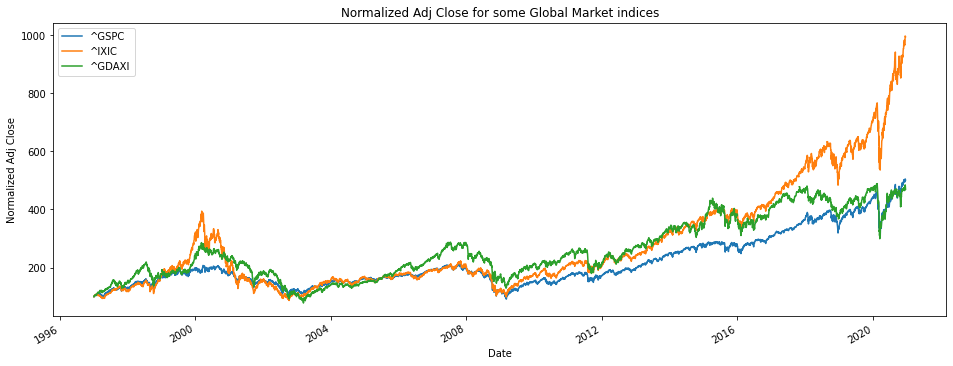

In [44]:
plt.figure()
(ind_data/ind_data.iloc[0] * 100).plot(figsize=(16,6))
plt.ylabel('Normalized Adj Close'), plt.title('Normalized Adj Close for some Global Market indices')

In [43]:
ind_returns = (ind_data / ind_data.shift(1)) - 1
annual_ind_returns = ind_returns.mean() * 250
annual_ind_returns

^GSPC     0.086255
^IXIC     0.126970
^GDAXI    0.077731
dtype: float64

As we can see, every annual return is positive. What this means for us is that, in the past two decades and a half, the companies listed whithin each index has provided a positive return for investment.

### American Market indices

For this second analysis, we will sorely focus on American indexes, combining two market indicators with the PG company
What we will see is the first type of analysis needed to perform when analyzing the stock market. What is to be noticed is that, according to the market indices, PG is doing better in the past decades.

(Text(0, 0.5, 'Normalized Adj Close'),
 Text(0.5, 1.0, 'Normalized Adj Close for some American Market indices'))

<Figure size 432x288 with 0 Axes>

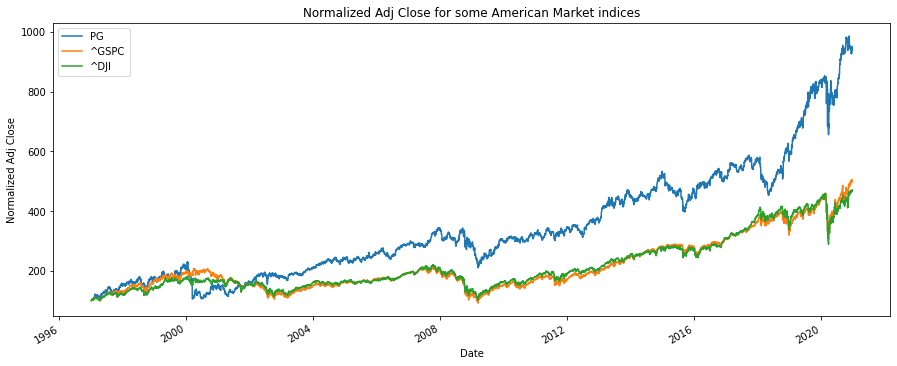

In [45]:
ind_tickers2 = ['PG','^GSPC','^DJI']

ind_data2 = pd.DataFrame()

for t in ind_tickers2:
    ind_data2[t] = pddr.DataReader(t, data_source='yahoo', start = '1997-1-1')['Adj Close']

plt.figure()
(ind_data2/ind_data2.iloc[0] * 100).plot(figsize=(15,6))
plt.ylabel('Normalized Adj Close'), plt.title('Normalized Adj Close for some American Market indices')

# Part 5: Risk assesment

*Definition 4.1*: A <u>risk</u> for an investor represents the variability of an investment's rate of return. As an investor, variability is a synonym of surprise, either good or bad. Regardless, we don't like surprises when investing.

With this in mind, it comes as no surprise that the best measure to assess risk is the variance. The variance is a measure of the dispersion of a set of data points around its mean value. Mathematically, the statistical variance $S^2$ can be calculated as:

<center>$S^2 = \sum_{i=1}^N\frac{ (x_i - \mu(x))}{N-1}.$</center>

From the definition, the standard deviation simply follows as $\sqrt{S^2}$. High variance is associated with volatility in the market, coming from plenty of factors.

As just mentioned, there are many factors which affect stocks. If the macroeconomic conditions are favourable, they facilitate business for companies and, therefore, share prices rise up. On the opposite, recession decreases consumption and the businesses suffer. 

Intuitively, and correct, the crisis affects industries of different types in different ways. For example, with the covid19 pandemic both pharmaceutics and supermarkets can still manage to sustain properly or even profit while, for example, car companies will suffer as purchasing cars decreases as a priority.

This is especially important when building an investment portfolio of stocks. By investing in different companies in different areas (or even different countries), we can reduce the company-specific type of risks.

### Risk of a security's rate of return

We keep working with the previous example to visualize this. We will work with the log rate of return

In [23]:
tickers = ['PG','MSFT','F','GE']
for t in tickers:
    portfolio[t+'_Simple_RoR'] = (portfolio[t]/portfolio[t].shift(1)) - 1
    portfolio[t+'_Log_RoR'] = np.log(portfolio[t]/portfolio[t].shift(1))
    print(t)
    print('Mean daily simple RoR of is '+str(portfolio[t+'_Simple_RoR'].mean()))
    print('Mean daily log RoR of is '+str(portfolio[t+'_Log_RoR'].mean()))
    print('Mean yearly simple RoR of is '+str(portfolio[t+'_Simple_RoR'].mean()* 250))
    print('Mean yearly log RoR of is '+str(portfolio[t+'_Log_RoR'].mean()* 250))
portfolio

PG
Mean daily simple RoR of is 0.0005335231709477423
Mean daily log RoR of is 0.0004309430651321425
Mean yearly simple RoR of is 0.1333807927369356
Mean yearly log RoR of is 0.10773576628303562
MSFT
Mean daily simple RoR of is 0.0008936333276507154
Mean daily log RoR of is 0.0006934433783569509
Mean yearly simple RoR of is 0.22340833191267884
Mean yearly log RoR of is 0.17336084458923773
F
Mean daily simple RoR of is 0.00043225190335492654
Mean daily log RoR of is 0.00011383393161551061
Mean yearly simple RoR of is 0.10806297583873163
Mean yearly log RoR of is 0.028458482903877654
GE
Mean daily simple RoR of is 0.0003539873312314178
Mean daily log RoR of is 0.00014886641777231752
Mean yearly simple RoR of is 0.08849683280785445
Mean yearly log RoR of is 0.03721660444307938


PG        MSFT         F         GE  PG_Simple_RoR  \
Date                                                                     
1995-01-03    8.215732    2.394761  4.242091   4.058363            NaN   
1995-01-04    8.149876    2.412169  4.356228   4.058363      -0.008016   
1995-01-05    8.034625    2.372380  4.318182   4.068309      -0.014141   
1995-01-06    8.051086    2.412169  4.318182   4.048415       0.002049   
1995-01-09    8.018162    2.397249  4.394274   4.008627      -0.004089   
...                ...         ...       ...        ...            ...   
2020-12-15  136.649994  214.130005  9.150000  11.099789       0.005889   
2020-12-16  137.270004  219.279999  9.040000  10.919954       0.004537   
2020-12-17  138.250000  219.419998  9.080000  10.870000       0.007139   
2020-12-18  139.039993  218.589996  8.950000  10.810000       0.005714   
2020-12-21  137.550003  223.119995  8.930000  10.742600      -0.010716   

            PG_Log_RoR  MSFT_Simple_RoR  MSFT_Log_RoR  F_Simple_RoR  \
Date                                                                  
1995-01-03         NaN              NaN           NaN           NaN   
1995-01-04   -0.008048         0.007269      0.007243      0.026906   
1995-01-05   -0.014242        -0.016495     -0.016633     -0.008734   
1995-01-06    0.002047         0.016772      0.016633      0.000000   
1995-01-09   -0.004098        -0.006185     -0.006205      0.017621   
...                ...              ...           ...           ...   
2020-12-15    0.005871        -0.000327     -0.000327      0.026936   
2020-12-16    0.004527         0.024051      0.023766     -0.012022   
2020-12-17    0.007114         0.000638      0.000638      0.004425   
2020-12-18    0.005698        -0.003783     -0.003790     -0.014317   
2020-12-21   -0.010774         0.020724      0.020512     -0.002235   

            F_Log_RoR  GE_Simple_RoR  GE_Log_RoR  
Date                                              
1995-01-03        NaN            NaN         NaN  
1995-01-04   0.026550       0.000000    0.000000  
1995-01-05  -0.008772       0.002451    0.002448  
1995-01-06   0.000000      -0.004890   -0.004902  
1995-01-09   0.017468      -0.009828   -0.009876  
...               ...            ...         ...  
2020-12-15   0.026580       0.025854    0.025526  
2020-12-16  -0.012095      -0.016202   -0.016334  
2020-12-17   0.004415      -0.004575   -0.004585  
2020-12-18  -0.014421      -0.005520   -0.005535  
2020-12-21  -0.002237      -0.006235   -0.006254  

[6540 rows x 12 columns]

And, most important, the covariance and correlation matrices can be calculated directly with pandas.

In [29]:
tickers = ['PG','MSFT','F','GE']
ror_tickers = []
for t in tickers:
    ror_tickers.append(t+'_Log_RoR')
    
print('Covariance matrix')
print(portfolio[ror_tickers].cov())
print('Correlation matrix')
print(portfolio[ror_tickers].corr())

Covariance matrix
              PG_Log_RoR  MSFT_Log_RoR  F_Log_RoR  GE_Log_RoR
PG_Log_RoR      0.000207      0.000077   0.000085    0.000101
MSFT_Log_RoR    0.000077      0.000400   0.000169    0.000167
F_Log_RoR       0.000085      0.000169   0.000636    0.000227
GE_Log_RoR      0.000101      0.000167   0.000227    0.000410
Correlation matrix
              PG_Log_RoR  MSFT_Log_RoR  F_Log_RoR  GE_Log_RoR
PG_Log_RoR      1.000000      0.268652   0.234834    0.347502
MSFT_Log_RoR    0.268652      1.000000   0.335906    0.412904
F_Log_RoR       0.234834      0.335906   1.000000    0.443624
GE_Log_RoR      0.347502      0.412904   0.443624    1.000000


### Calculating portfolio's risk

In [36]:
print(weights,weights2)
portfolio_var = (weights.T).dot(np.dot(portfolio[ror_tickers].cov() * 250,weights))
portfolio_std = portfolio_var ** 0.5
print(portfolio_var)
print(str(round(portfolio_std,5)*100)+' %')

[0.25 0.25 0.25 0.25] [0.4 0.4 0.1 0.1]
0.0516758780310139
22.732 %
